# Attribute Inference Attack (AIA) Dataset E

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/PRIVACY'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for membership attack simulation
from attribute_inference import DataPreProcessor
from attribute_inference import RiskAttributesPredictors
from attribute_inference import identified_attributes_percentage

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/E_PimaIndiansDiabetes_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/E_PimaIndiansDiabetes_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/E_PimaIndiansDiabetes_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/E_PimaIndiansDiabetes_Synthetic_WGANGP.csv'}
categorical_columns = ['Outcome']
data = dict()

qid_columns = ['Age','BMI','Pregnancies']
risk_attributes = ['Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Outcome']
data = dict()
data_qid = dict()
data_risk = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    #data[name] = data[name].drop(['id'],axis=1)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category').cat.codes
    data_qid[name] = data[name][qid_columns]
    data_risk[name] = data[name][risk_attributes]
data

{'Real':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              2       84              0              0        0   0.0   
 1              9      112             82             24        0  28.2   
 2              1      139             46             19       83  28.7   
 3              0      161             50              0        0  21.9   
 4              6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 609            5      139             64             35      140  28.6   
 610            1       96            122              0        0  22.4   
 611           10      101             86             37        0  45.6   
 612            0      141              0              0        0  42.4   
 613            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age  Outcome  
 0                       0.304   21        

In [5]:
data_qid

{'Real':      Age   BMI  Pregnancies
 0     21   0.0            2
 1     50  28.2            9
 2     22  28.7            1
 3     65  21.9            0
 4     46  46.2            6
 ..   ...   ...          ...
 609   26  28.6            5
 610   27  22.4            1
 611   38  45.6           10
 612   29  42.4            0
 613   21  22.5            0
 
 [614 rows x 3 columns],
 'GM':      Age        BMI  Pregnancies
 0     45  21.454652           11
 1     25  23.818868            0
 2     63  27.547578            5
 3     38  32.149746            3
 4     25  30.608647            9
 ..   ...        ...          ...
 609   42  40.607103            4
 610   21  29.984722            7
 611   22  23.307341            1
 612   29  27.208406            6
 613   28  36.714954            7
 
 [614 rows x 3 columns],
 'SDV':      Age   BMI  Pregnancies
 0     34  41.9            3
 1     38  37.7            8
 2     24  30.7            1
 3     24  35.5            3
 4     35  24.4         

In [6]:
data_risk

{'Real':      Glucose  BloodPressure  SkinThickness  Insulin  DiabetesPedigreeFunction  \
 0         84              0              0        0                     0.304   
 1        112             82             24        0                     1.282   
 2        139             46             19       83                     0.654   
 3        161             50              0        0                     0.254   
 4        134             80             37      370                     0.238   
 ..       ...            ...            ...      ...                       ...   
 609      139             64             35      140                     0.411   
 610       96            122              0        0                     0.207   
 611      101             86             37        0                     1.136   
 612      141              0              0        0                     0.205   
 613      125             96              0        0                     0.262   
 
      

## 2. Train models to predict attributes values

In [7]:
#initialize classifiers
categorical_columns = None
numerical_columns = ['Age','BMI','Pregnancies']
categories = None
    
classifiers_all = dict()
data_preprocessors = dict()
attributes_models_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(data_qid[name])
    
#     attributes_models = dict()
#     attributes_models = train_attributes_prediction_models(data_risk[name], x_train)
    attributes_models_all[name] = RiskAttributesPredictors(data_risk[name], qid_columns)
    attributes_models_all[name].train_attributes_prediction_models(x_train)
    
    print('####################################################')

GM
Model trained for Glucose attribute
Model trained for BloodPressure attribute
Model trained for SkinThickness attribute
Model trained for Insulin attribute
Model trained for DiabetesPedigreeFunction attribute
Model trained for Outcome attribute
####################################################
SDV
Model trained for Glucose attribute
Model trained for BloodPressure attribute
Model trained for SkinThickness attribute
Model trained for Insulin attribute
Model trained for DiabetesPedigreeFunction attribute
Model trained for Outcome attribute
####################################################
CTGAN
Model trained for Glucose attribute
Model trained for BloodPressure attribute
Model trained for SkinThickness attribute
Model trained for Insulin attribute
Model trained for DiabetesPedigreeFunction attribute
Model trained for Outcome attribute
####################################################
WGANGP
Model trained for Glucose attribute
Model trained for BloodPressure attribute
Model tr

## 3. Read Real Data and Find Combinations

In [8]:
#read real dataset
real_data = pd.read_csv(HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv')
real_data['Outcome'] = real_data['Outcome'].astype('category').cat.codes
real_data = real_data.sample(frac=1)
real_data = real_data[0:int(len(real_data)*0.5)]
real_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
17,2,100,66,20,90,32.9,0.867,28,1
223,4,144,58,28,140,29.5,0.287,37,0
330,0,95,80,45,92,36.5,0.330,26,0
335,3,163,70,18,105,31.6,0.268,28,1
160,1,121,78,39,74,39.0,0.261,28,0
...,...,...,...,...,...,...,...,...,...
163,3,103,72,30,152,27.6,0.730,27,0
107,1,128,88,39,110,36.5,1.057,37,1
604,0,74,52,10,36,27.8,0.269,22,0
494,7,168,88,42,321,38.2,0.787,40,1


In [9]:
combinations = real_data[qid_columns]
combinations.drop_duplicates(keep='first',inplace=True) 
combinations

,Age,BMI,Pregnancies
17,28,32.9,2
223,37,29.5,4
330,26,36.5,0
335,28,31.6,3
160,28,39.0,1
...,...,...,...
163,27,27.6,3
107,37,36.5,1
604,22,27.8,0
494,40,38.2,7


In [10]:
results_data_all = dict()
columns_results = ['Age','BMI','Pregnancies','Glucose_rmse','BloodPressure_rmse','SkinThickness_rmse','Insulin_rmse',
                   'DiabetesPedigreeFunction_rmse','Outcome_accuracy']

for name in SYNTHESIZERS : 
    print(name)
    results_data = pd.DataFrame(columns = columns_results)
    
    for comb in combinations.values :
    
        batch = real_data.loc[(real_data['Age'] == comb[0]) & (real_data['BMI'] == comb[1])
                              & (real_data['Pregnancies'] == comb[2])]
        
        row_data = (batch[qid_columns].values[0]).tolist()
        print(row_data)
        x_test = data_preprocessors[name].preprocess_test_data(batch[qid_columns])
        print(x_test.shape)
        
        row = attributes_models_all[name].evaluate_attributes_prediction_models(x_test, batch, columns_results)
        
        results_data = results_data.append(row)
        
    results_data_all[name] = results_data
    print('#######################################')

GM
[28.0, 32.9, 2.0]
(1, 3)
Model evaluated for Glucose attribute
Model evaluated for BloodPressure attribute
Model evaluated for SkinThickness attribute
Model evaluated for Insulin attribute
Model evaluated for DiabetesPedigreeFunction attribute
Model evaluated for Outcome attribute
[37.0, 29.5, 4.0]
(1, 3)
Model evaluated for Glucose attribute
Model evaluated for BloodPressure attribute
Model evaluated for SkinThickness attribute
Model evaluated for Insulin attribute
Model evaluated for DiabetesPedigreeFunction attribute
Model evaluated for Outcome attribute
[26.0, 36.5, 0.0]
(1, 3)
Model evaluated for Glucose attribute
Model evaluated for BloodPressure attribute
Model evaluated for SkinThickness attribute
Model evaluated for Insulin attribute
Model evaluated for DiabetesPedigreeFunction attribute
Model evaluated for Outcome attribute
[28.0, 31.6, 3.0]
(2, 3)
Model evaluated for Glucose attribute
Model evaluated for BloodPressure attribute
Model evaluated for SkinThickness attribute


In [11]:
results_data_all

{'GM':      Age   BMI  Pregnancies  Glucose_rmse  BloodPressure_rmse  \
 0   28.0  32.9          2.0           0.0                 0.0   
 0   37.0  29.5          4.0           0.0                 0.0   
 0   26.0  36.5          0.0           0.0                 0.0   
 0   28.0  31.6          3.0           0.0                 0.0   
 0   28.0  39.0          1.0           0.0                 0.0   
 ..   ...   ...          ...           ...                 ...   
 0   27.0  27.6          3.0           0.0                 0.0   
 0   37.0  36.5          1.0           0.0                 0.0   
 0   22.0  27.8          0.0           0.0                 0.0   
 0   40.0  38.2          7.0           0.0                 0.0   
 0   25.0  19.6          1.0           0.0                 0.0   
 
     SkinThickness_rmse  Insulin_rmse  DiabetesPedigreeFunction_rmse  \
 0                  0.0           0.0                       0.130565   
 0                  0.0           0.0                   

## 5. Visuzalize obtained results

In [12]:
results_columns = ['Glucose_rmse','BloodPressure_rmse','SkinThickness_rmse','Insulin_rmse','DiabetesPedigreeFunction_rmse',
                   'Outcome_accuracy']
len(results_columns)

6

In [13]:
for name in SYNTHESIZERS : 
    identified_attributes = identified_attributes_percentage(results_data_all[name], results_columns)
    print(name,' : ', identified_attributes)

GM  :  0.83
SDV  :  0.83
CTGAN  :  0.67
WGANGP  :  0.83


In [14]:
boxplots_data = dict()

for c in results_columns :
    boxplots_data[c] = results_data_all[SYNTHESIZERS[0]][c]
    
    for i in range(1,len(SYNTHESIZERS)) :
        boxplots_data[c] = np.column_stack((boxplots_data[c], results_data_all[SYNTHESIZERS[i]][c]))

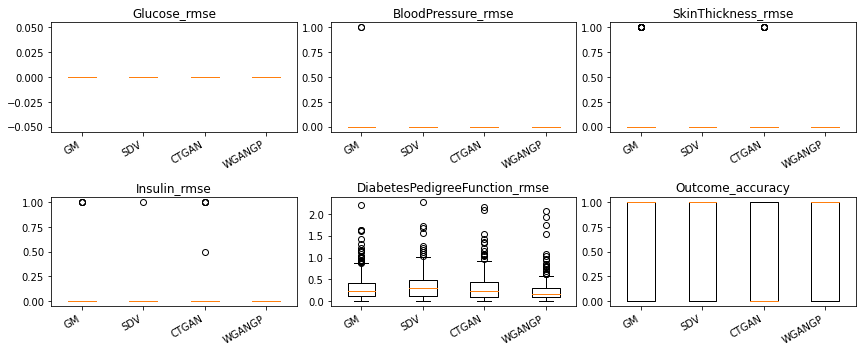

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,2.5*2))
axs_idxs = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]
idx = dict(zip(results_columns,axs_idxs))

for c in results_columns :
    ax = axs[idx[c][0], idx[c][1]]
    ax.boxplot(boxplots_data[c])
    ax.set_title(c)
    ax.set_xticklabels(SYNTHESIZERS)
    
for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")    

plt.tight_layout()
fig.savefig('INFERENCE TESTS RESULTS/ATTRIBUTES INFERENCE TESTS RESULTS.svg', bbox_inches='tight')